# EDA

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# For Display
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

##### Load Datasets

In [36]:
routes_df = pd.read_csv("../datasets/processed/master_routes.csv")
delay_df = pd.read_csv("../datasets/processed/synthetic_delay_data.csv")

In [37]:
routes_df.head()

,TrainNumber,StationName,StationCode,ArrivalTime,DepartureTime,Distance
0,12002,NEW DELHI,NDLS,06:00:00,06:00:00,0
1,12002,MATHURA JN.,MTJ,07:23:00,07:24:00,137
2,12002,AGRA CANTT,AGC,07:57:00,08:02:00,191
3,12002,DHAULPUR,DHO,08:41:00,08:42:00,243
4,12002,MORENA,MRA,09:01:00,09:02:00,259


In [38]:
delay_df.head()

,TrainNumber,Date,Distance,Weather,FestivalImpact,TimeOfDay,DelayMinutes
0,12002,2024-01-01,690,Fog,FestivalDay,Evening,70
1,12002,2024-01-02,690,Rain,FestivalDay,Night,55
2,12002,2024-01-03,690,Rain,FestivalDay,Night,48
3,12002,2024-01-04,690,Clear,NaN,Day,31
4,12002,2024-01-05,690,Storm,NaN,Morning,73


##### Merge Datasets

In [39]:
merged_df = pd.merge(delay_df, routes_df, on='TrainNumber', how="left")

In [40]:
merged_df.head()

,TrainNumber,Date,Distance_x,Weather,FestivalImpact,TimeOfDay,DelayMinutes,StationName,StationCode,ArrivalTime,DepartureTime,Distance_y
0,12002,2024-01-01,690,Fog,FestivalDay,Evening,70,NEW DELHI,NDLS,06:00:00,06:00:00,0
1,12002,2024-01-01,690,Fog,FestivalDay,Evening,70,MATHURA JN.,MTJ,07:23:00,07:24:00,137
2,12002,2024-01-01,690,Fog,FestivalDay,Evening,70,AGRA CANTT,AGC,07:57:00,08:02:00,191
3,12002,2024-01-01,690,Fog,FestivalDay,Evening,70,DHAULPUR,DHO,08:41:00,08:42:00,243
4,12002,2024-01-01,690,Fog,FestivalDay,Evening,70,MORENA,MRA,09:01:00,09:02:00,259


##### Basic checks

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56730 entries, 0 to 56729
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TrainNumber     56730 non-null  int64 
 1   Date            56730 non-null  object
 2   Distance_x      56730 non-null  int64 
 3   Weather         56730 non-null  object
 4   FestivalImpact  38534 non-null  object
 5   TimeOfDay       56730 non-null  object
 6   DelayMinutes    56730 non-null  int64 
 7   StationName     56730 non-null  object
 8   StationCode     56730 non-null  object
 9   ArrivalTime     56730 non-null  object
 10  DepartureTime   56730 non-null  object
 11  Distance_y      56730 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 5.2+ MB


In [42]:
merged_df.describe()

,TrainNumber,Distance_x,DelayMinutes,Distance_y
count,56730.000000,56730.000000,56730.000000,56730.000000
mean,12697.341935,1685.477419,91.299683,837.058065
std,299.650982,341.085124,31.895252,561.719196
min,12002.000000,690.000000,7.000000,0.000000
25%,12306.000000,1438.000000,69.000000,321.000000
50%,12860.000000,1860.000000,89.000000,802.000000
75%,12903.000000,1885.000000,112.000000,1238.000000
max,12953.000000,1979.000000,192.000000,1979.000000


In [43]:
merged_df.isnull().sum()

TrainNumber           0
Date                  0
Distance_x            0
Weather               0
FestivalImpact    18196
TimeOfDay             0
DelayMinutes          0
StationName           0
StationCode           0
ArrivalTime           0
DepartureTime         0
Distance_y            0
dtype: int64

#### Delay Distribution

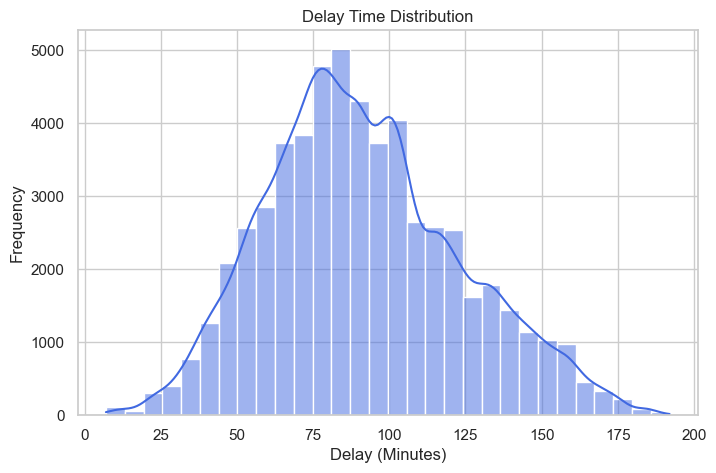

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_df["DelayMinutes"], bins=30, kde=True, color="royalblue")
plt.title("Delay Time Distribution")
plt.xlabel("Delay (Minutes)")
plt.ylabel("Frequency")
plt.show()

#### Impact of weather

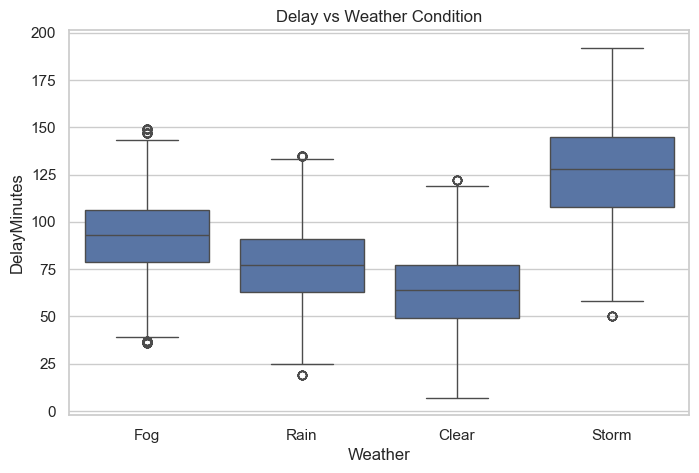

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Weather", y="DelayMinutes", data=merged_df)
plt.title("Delay vs Weather Condition")
plt.show()

#### Festival Impact

In [46]:
# Convert FestivalImpact values to numeric impact
merged_df["FestivalImpact"] = merged_df["FestivalImpact"].map({
    "FestivalDay" : 1,
    "FestivalEve" : 0.5
}).fillna(0)

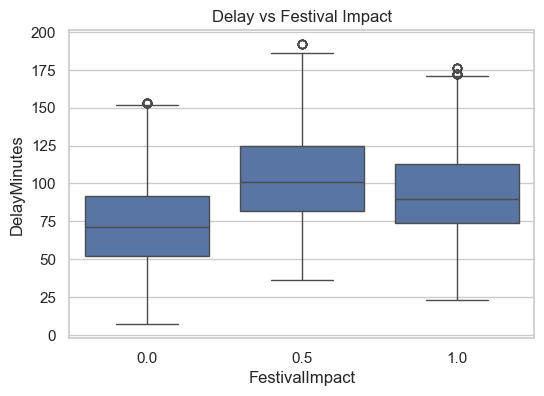

In [47]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="FestivalImpact", y="DelayMinutes", data=merged_df)
plt.title("Delay vs Festival Impact")
plt.show()

#### Time of Day Impact

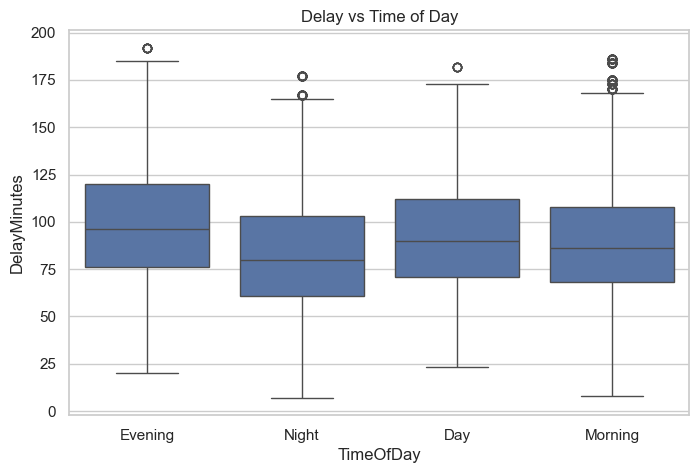

In [48]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="TimeOfDay", y="DelayMinutes", data=merged_df)
plt.title("Delay vs Time of Day")
plt.show()

#### Distance Impact

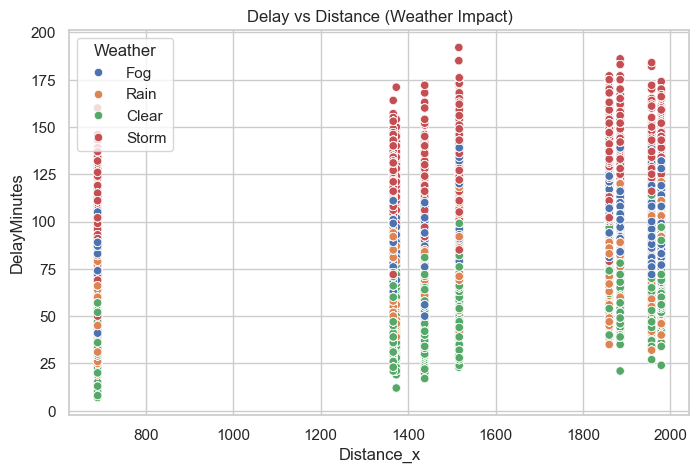

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Distance_x", y="DelayMinutes", hue="Weather", data=merged_df)
plt.title("Delay vs Distance (Weather Impact)")
plt.show()

#### Save Final clean Dataset

In [50]:
merged_df.to_csv("../datasets/processed/final_clean_dataset.csv", index=False)